In [171]:
!pip install numpy pandas matplotlib seaborn scikit-learn 


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('loan_approval_dataset.csv')
df.columns = df.columns.str.strip()


In [173]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [174]:
df.describe()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [175]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [176]:
df.isnull().sum()


loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [177]:
# Strip leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

# Now try your command again
print(df['loan_status'].value_counts())

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


FEATURE ENGINEERING 

After we collecting the data, Next step we need to understand what kind of data we have.

In [178]:
columns_to_remove = ['loan_id']

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)

In [179]:
df.shape

(4269, 12)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


Feature Engineering through Aggregation

In banking, we care about Liquidity (how fast can you get cash?) and Collateral (what physical property can we seize?).

Simplification: Instead of having four separate columns that might "confuse" the model with too much noise, we combine them into two logical categories: Movable (Liquid) and Immovable (Fixed).

Reducing Dimensionality: By dropping the 4 original columns and adding 2 new ones, the model has fewer variables to calculate, which often leads to better performance and prevents Overfitting (where the model memorizes specific asset values instead of learning the general wealth of the applicant).

In [181]:
df.columns = df.columns.str.strip()

#  Create the features (Now you can type them without the extra space!)
df['Movable_assets'] = df['bank_asset_value'] + df['luxury_assets_value']
df['Immovable_assets'] = df['residential_assets_value'] + df['commercial_assets_value']

#  Drop the old columns
df.drop(columns=['bank_asset_value', 'luxury_assets_value', 'residential_assets_value', 'commercial_assets_value'], inplace=True)

#  Check the result
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [182]:
def uniquevals(col):
    print(f'Unique Values in {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of {col} is: {len(df[col].value_counts())}')
    
    
    
    
for col in df.columns:
    valuecounts(col)
#     uniquevals(col)
    print("-"*75)

Valuecounts of no_of_dependents is: 6
---------------------------------------------------------------------------
Valuecounts of education is: 2
---------------------------------------------------------------------------
Valuecounts of self_employed is: 2
---------------------------------------------------------------------------
Valuecounts of income_annum is: 98
---------------------------------------------------------------------------
Valuecounts of loan_amount is: 378
---------------------------------------------------------------------------
Valuecounts of loan_term is: 10
---------------------------------------------------------------------------
Valuecounts of cibil_score is: 601
---------------------------------------------------------------------------
Valuecounts of loan_status is: 2
---------------------------------------------------------------------------
Valuecounts of Movable_assets is: 484
---------------------------------------------------------------------------
Valu

In [183]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['education', 'self_employed', 'loan_status'], dtype='object'),
 Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
        'cibil_score', 'Movable_assets', 'Immovable_assets'],
       dtype='object'))

In [184]:
!pip install missingno
!pip install warnings


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [185]:
import missingno as msno
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

<Axes: >

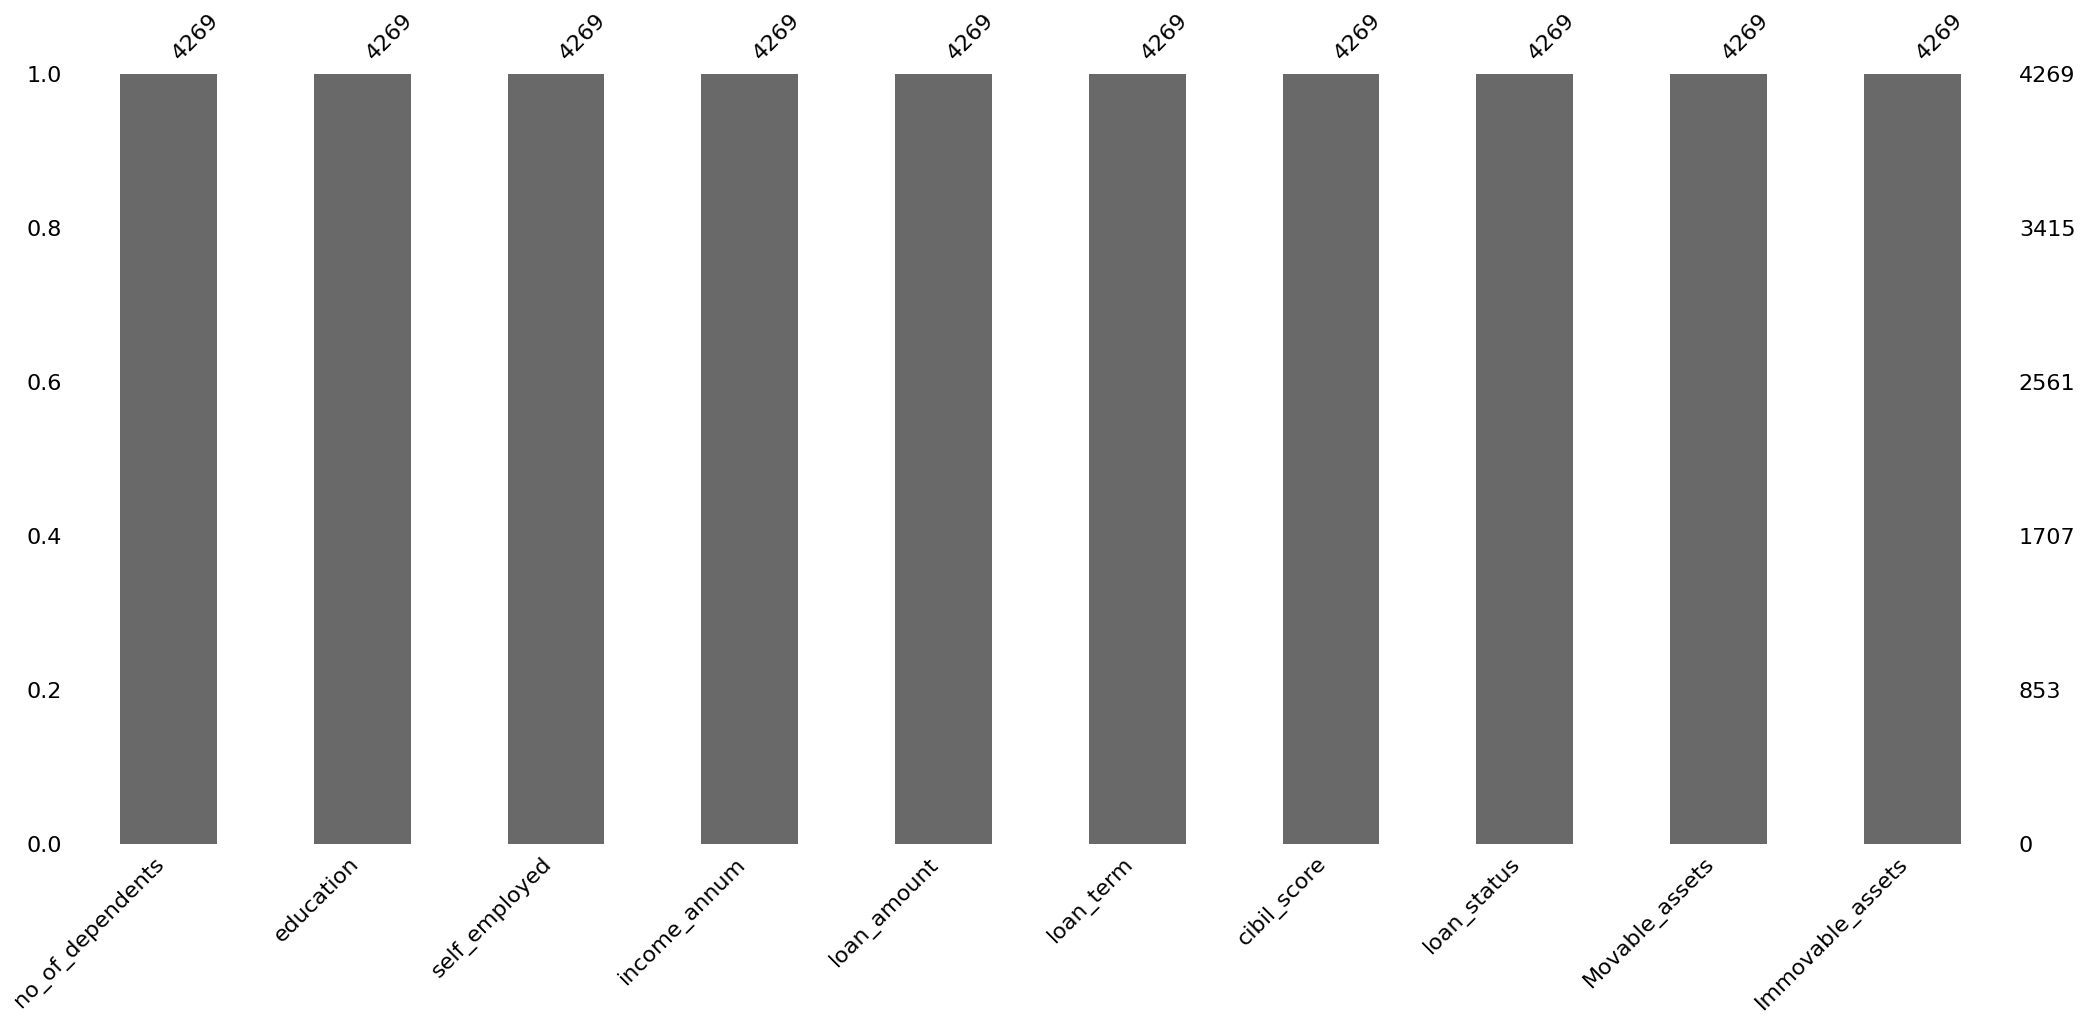

In [186]:
msno.bar(df)

In [187]:
print()
df.isna().sum()

no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
Movable_assets      0
Immovable_assets    0
dtype: int64

In [188]:
# Show all rows where CIBIL score is greater than 900
extreme_cibil = df[df['cibil_score'] > 900]
print(extreme_cibil)

Empty DataFrame
Columns: [no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, loan_status, Movable_assets, Immovable_assets]
Index: []


In [189]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no_of_dependents  4269 non-null   int64 
 1   education         4269 non-null   object
 2   self_employed     4269 non-null   object
 3   income_annum      4269 non-null   int64 
 4   loan_amount       4269 non-null   int64 
 5   loan_term         4269 non-null   int64 
 6   cibil_score       4269 non-null   int64 
 7   loan_status       4269 non-null   object
 8   Movable_assets    4269 non-null   int64 
 9   Immovable_assets  4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


EDA


In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set_style('dark')

sns.countplot for categorical data
hue =	The "Color Coded" instruction. It tells Seaborn to split each bar into different colors based on a second category.

Text(0.5, 1.0, 'Number of Dependents')

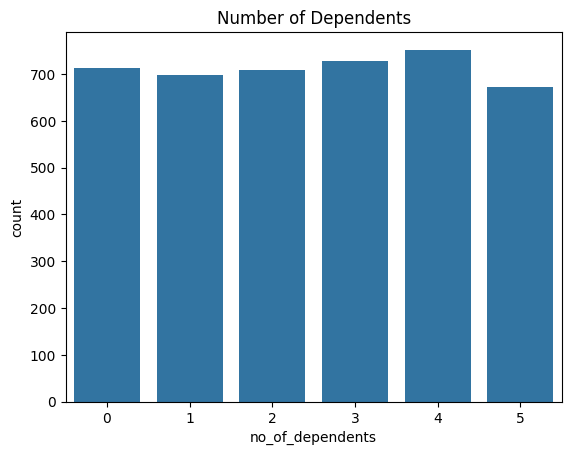

In [191]:
sns.countplot(x = 'no_of_dependents', data = df).set_title('Number of Dependents')

Text(0.5, 1.0, 'Number of Dependents by Loan Status')

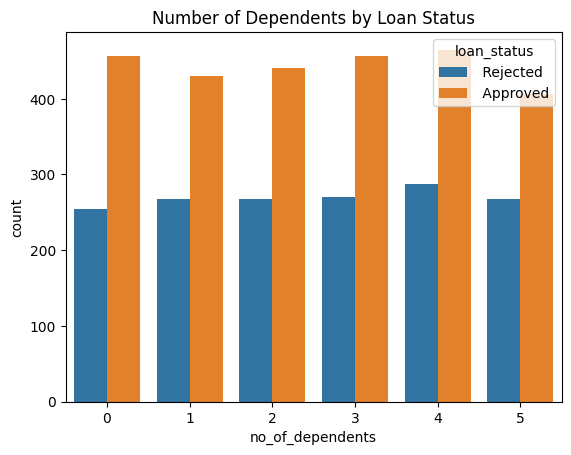

In [192]:
sns.countplot(x = 'no_of_dependents', data = df, hue = 'loan_status').set_title('Number of Dependents by Loan Status')

The graph tells us that when someone has more family members they take care of, their chances of loan rejection go up. But what's interesting is that the number of people who get loans approved doesn't change much, even if they have more family members. This means my guess that loans might be approved less often for people with more family members isn't really right, based on this graph. It shows that sometimes what we think might not match what actually happens.

Text(0.5, 1.0, 'Self Employed')

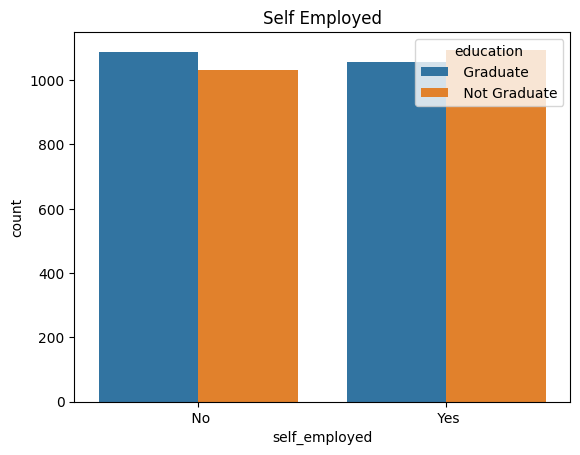

In [193]:
sns.countplot(x='self_employed', data = df, hue = 'education').set_title('Self Employed')

 majority of non-graduate applicants are self-employed, while most graduate applicants are not self-employed

<Axes: xlabel='education', ylabel='income_annum'>

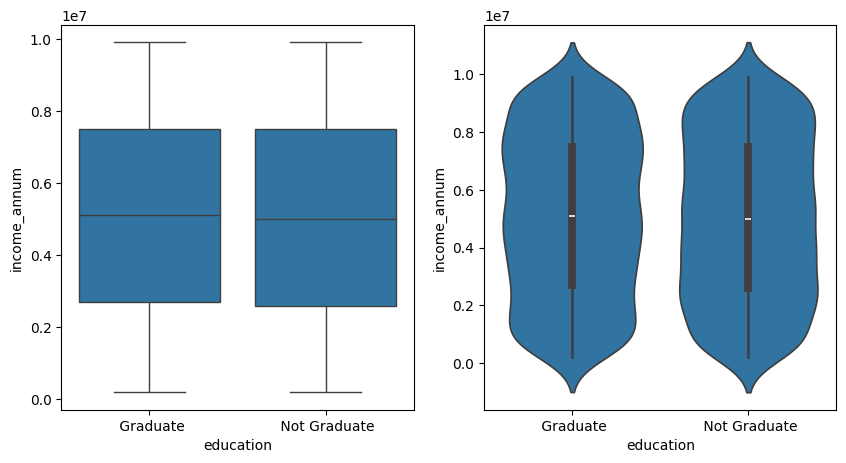

In [194]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = 'education', y = 'income_annum', data = df, ax=ax[0])
sns.violinplot(x = 'education', y = 'income_annum', data = df, ax=ax[1])


 The boxplot reveals that both graduates and non-graduates have similar median incomes, indicating that having a degree doesn't necessarily lead to a significant income advantage

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

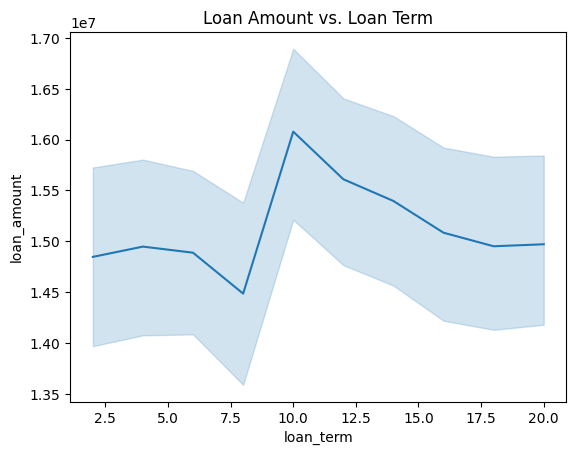

In [195]:
sns.lineplot(x = 'loan_term', y = 'loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

In [196]:
df.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000


Loan Amount and Loan Status

<Axes: xlabel='loan_status', ylabel='loan_amount'>

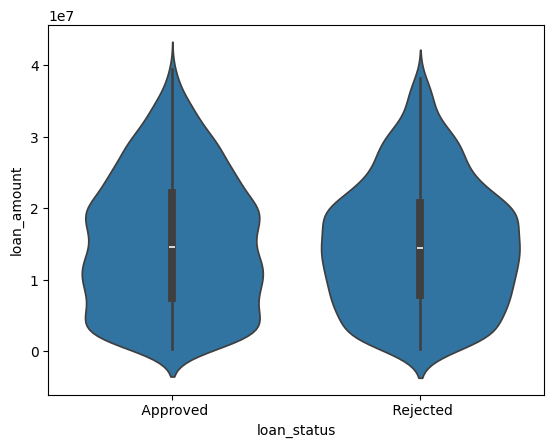

In [197]:
sns.violinplot(x='loan_status', y='loan_amount', data=df)


<Axes: xlabel='loan_term', ylabel='loan_amount'>

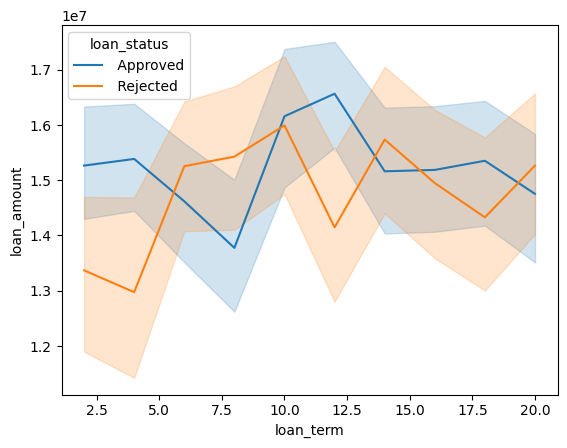

In [198]:
sns.lineplot(x='loan_term', y='loan_amount', data=df, hue='loan_status')

The graph shows how loan amount, the time to repay, and loan approval are connected. It's clear that loans that are accepted often have higher amounts and shorter repayment times. On the other hand, loans that are rejected are usually for lower amounts and longer repayment periods. This could be because the bank prefers to approve loans that are easier to pay back quickly and that bring in more profit. They might not want to deal with very small loans due to the costs involved. However, other things like how reliable the person borrowing is with money also matter in these decisions. The graph gives us a glimpse into how banks think when they decide to approve or reject loans.

<Axes: xlabel='cibil_score', ylabel='Count'>

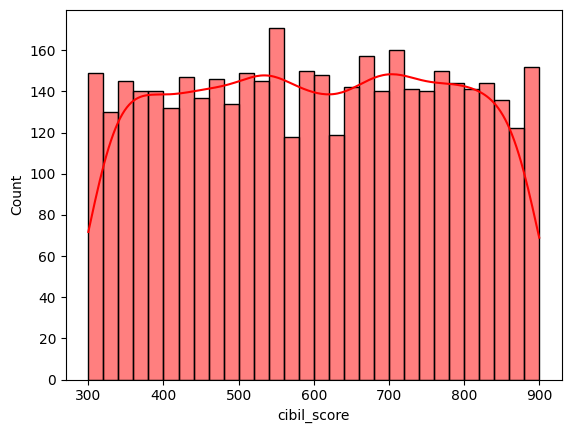

In [199]:
sns.histplot(df["cibil_score"],bins=30, kde=True, color='red')

Looking at the table, most customers have low CIBIL scores (below 649), which could make it hard for them to get loans approved. But there's a good number of customers with high scores (above 649), which is positive for the bank. The bank can give these high-score customers special treatment like good deals and offers to get them interested in taking loans from the bank. Based on this, we can guess that people with high CIBIL scores are more likely to get their loans approved. This is because higher scores usually mean they are better with money. Overall, the bank can use this information to make decisions that help both the bank and its customers.

CIBIL Score Vs Loan Status

<Axes: xlabel='loan_status', ylabel='cibil_score'>

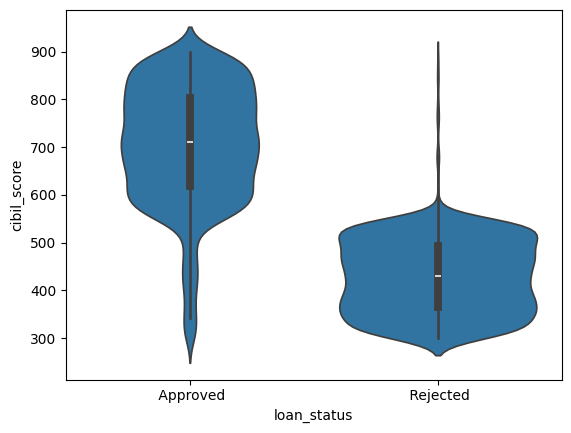

In [200]:
sns.violinplot(x='loan_status', y='cibil_score', data=df)

The graph with the shapes (violinplot) shows that people who got their loans approved tend to have higher CIBIL scores, mostly above 600. But for those whose loans weren't approved, the scores are more spread out and usually lower than 550. This means having a higher CIBIL score, especially over 600, really boosts the chances of getting a loan approved. It's clear that a good CIBIL score is important for loan approval.

Text(0.5, 1.0, 'Immovable_assets ')

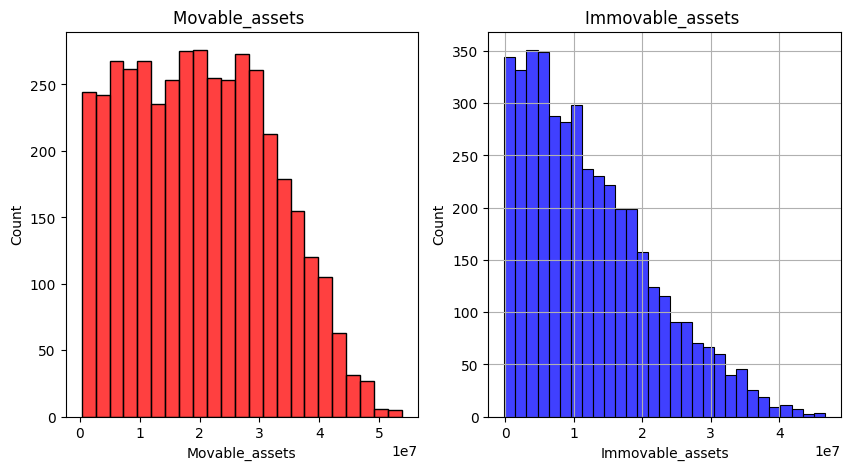

In [201]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
plt.title("Movable_assets ")

plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')
plt.title("Immovable_assets ")

DATA PRE_PROCESSING

In [202]:
df.columns = df.columns.str.strip()
print(df['education'].unique())
print(df['self_employed'].unique())
print(df['loan_status'].unique())


[' Graduate' ' Not Graduate']
[' No' ' Yes']
[' Approved' ' Rejected']


In [203]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [204]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [205]:
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

df['education'] = df['education'].map({
    'Not Graduate': 0,
    'Graduate': 1
})

df['self_employed'] = df['self_employed'].map({
    'No': 0,
    'Yes': 1
})

df['loan_status'] = df['loan_status'].map({
    'Rejected': 0,
    'Approved': 1
})


In [206]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


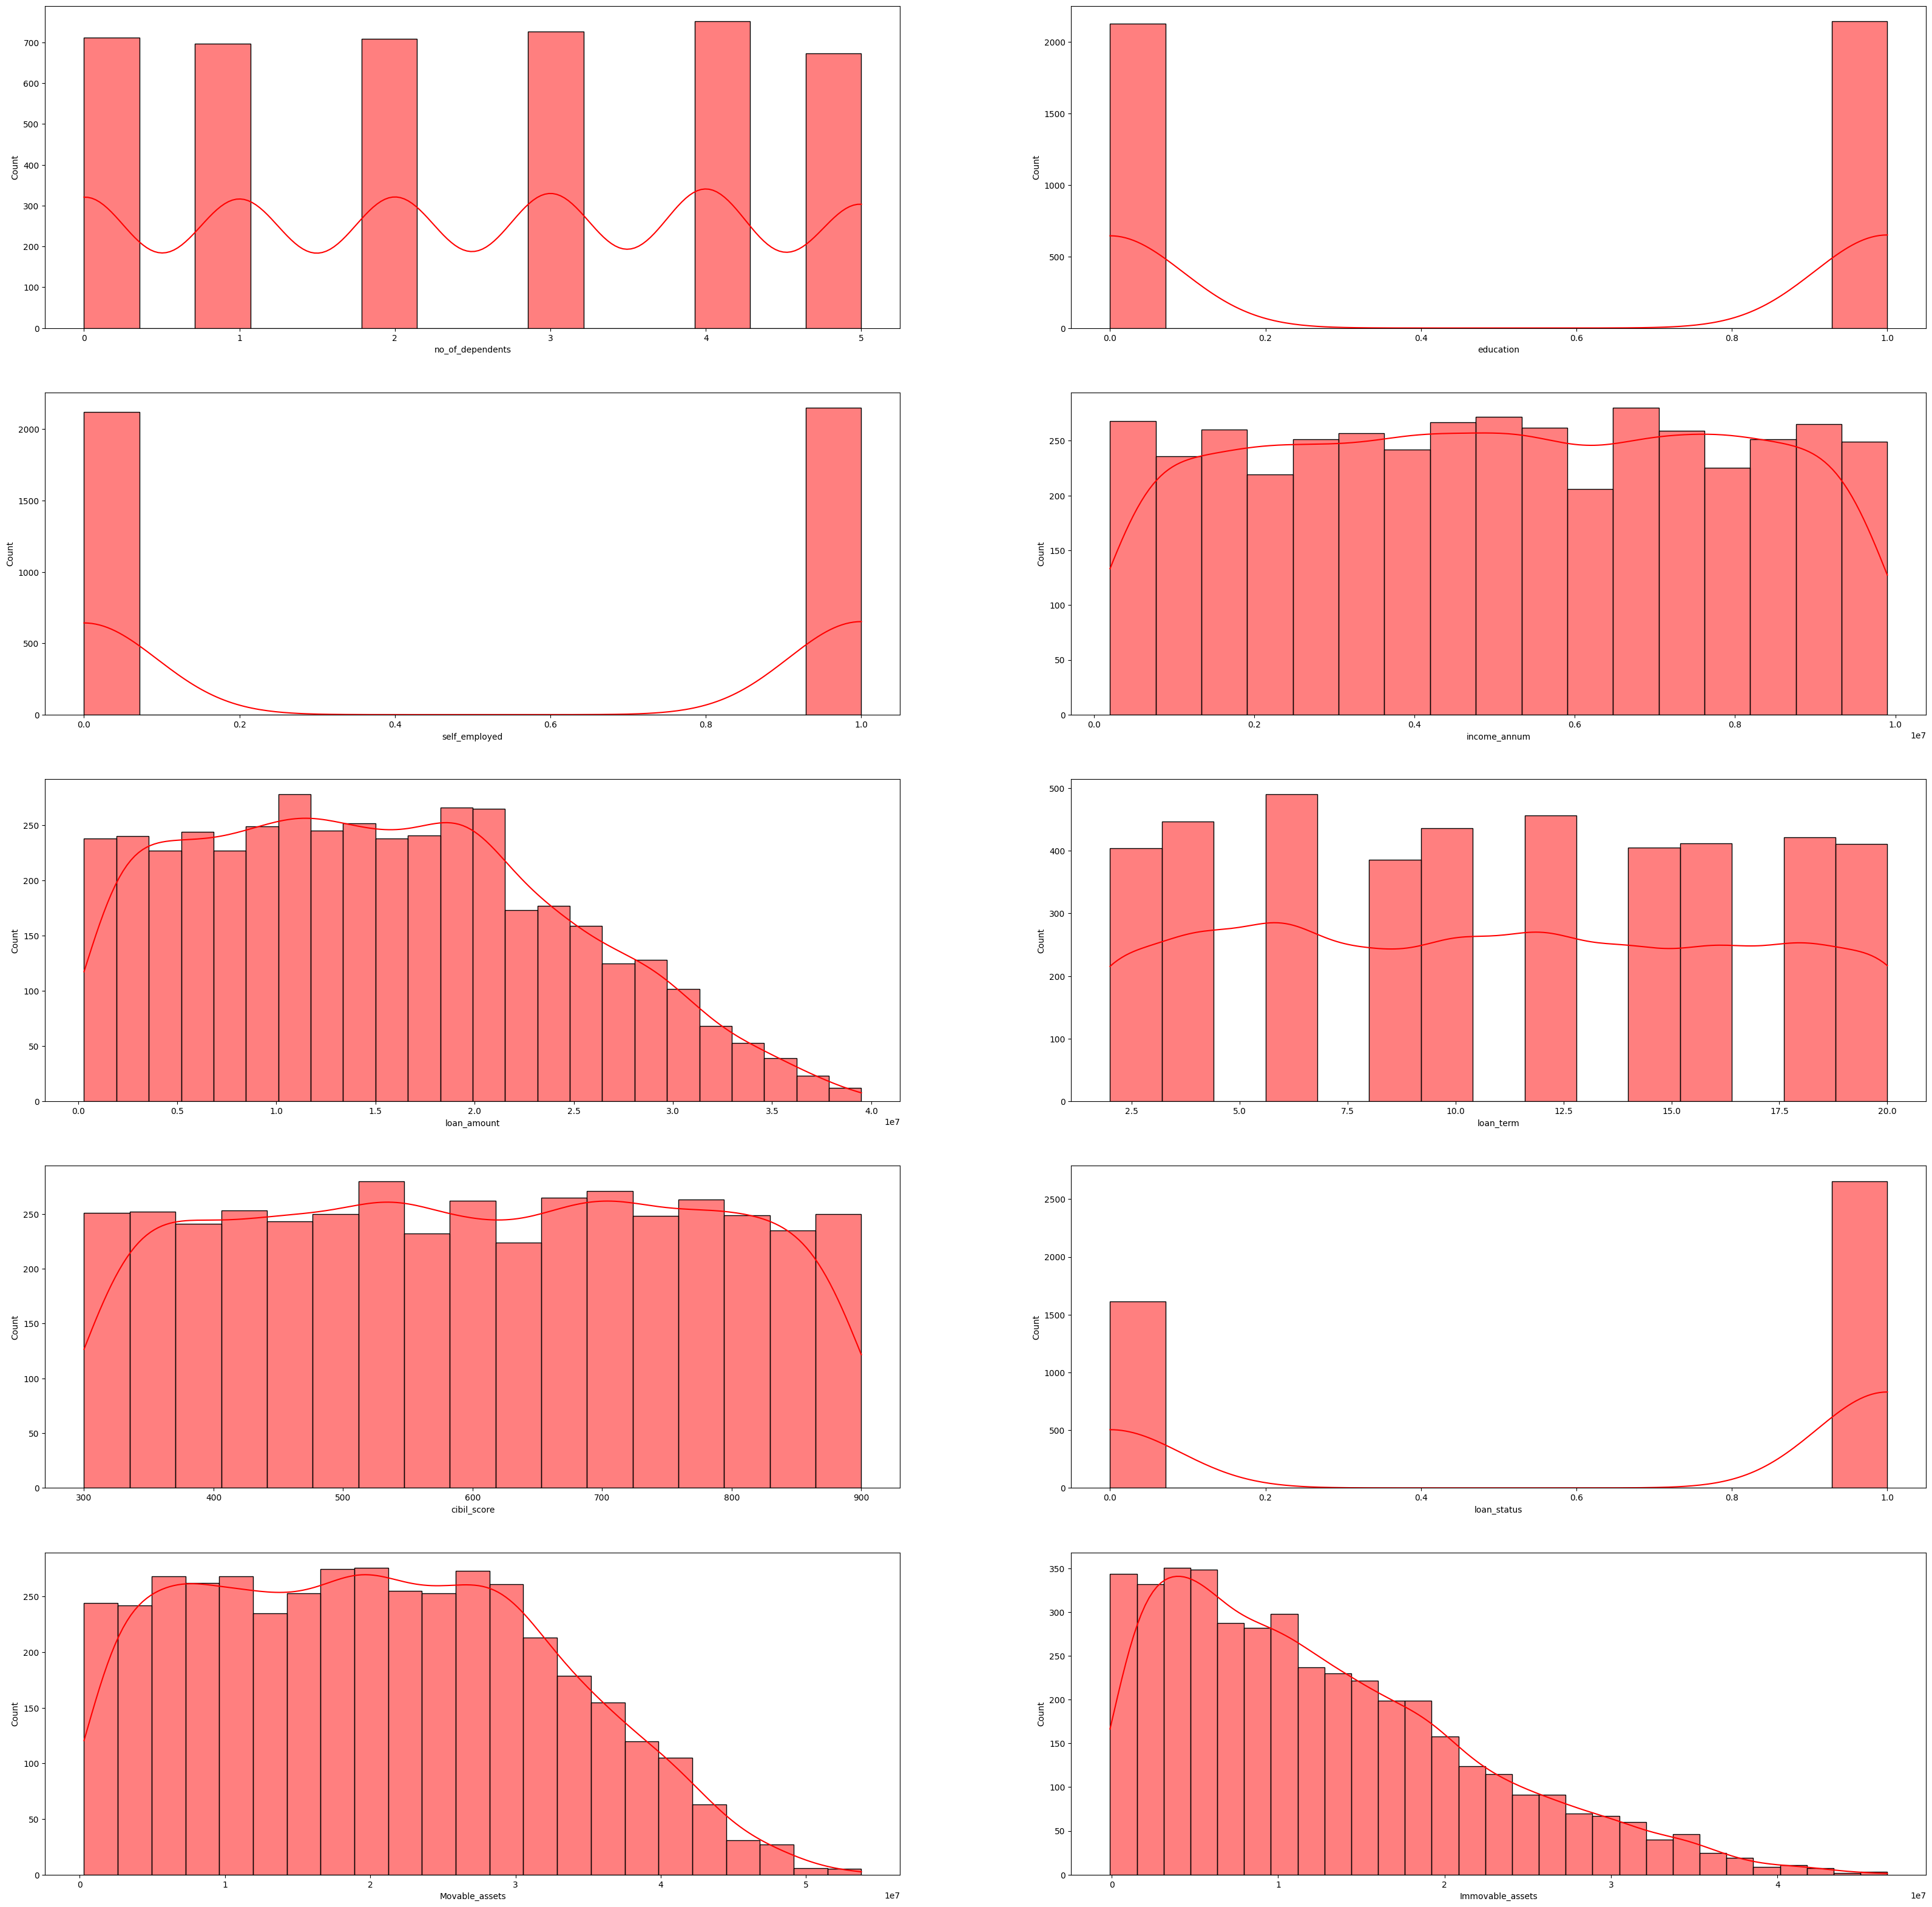

In [207]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col],kde=True, color='red', ax = ax)

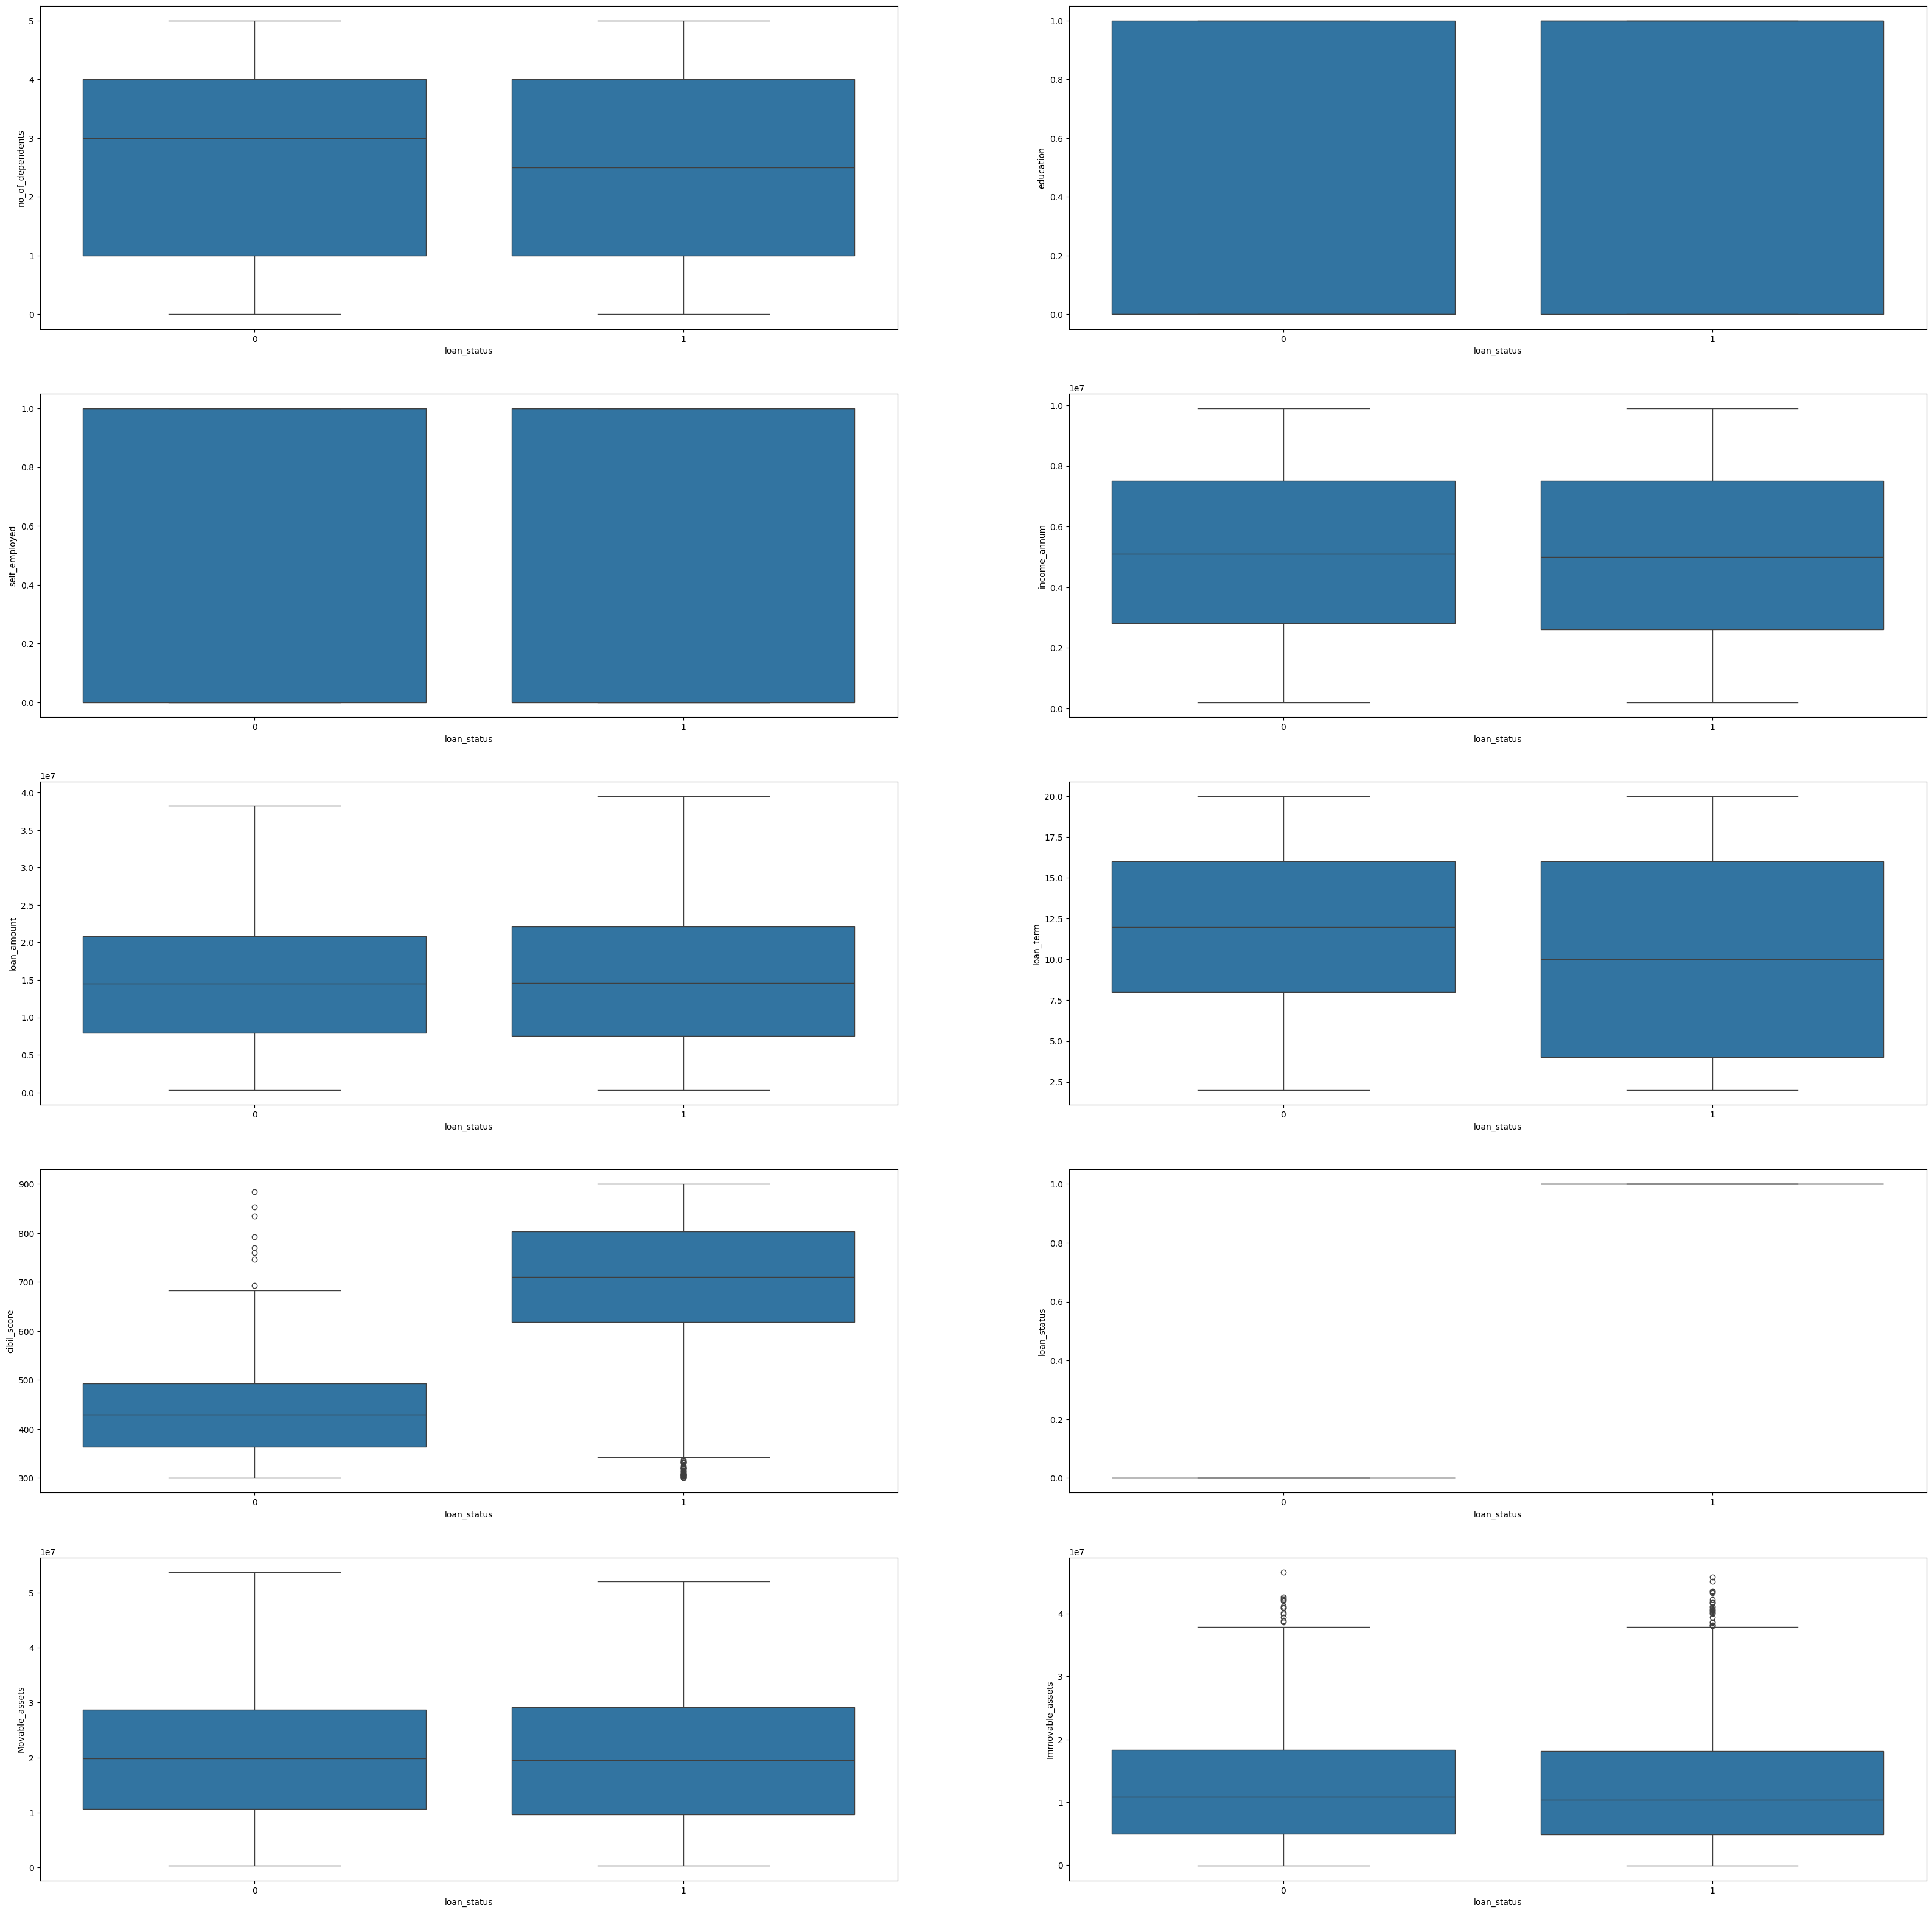

In [208]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x='loan_status',y=df[col], ax = ax , data=df)

In [209]:
import warnings

# Suppress warnings within this code block
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

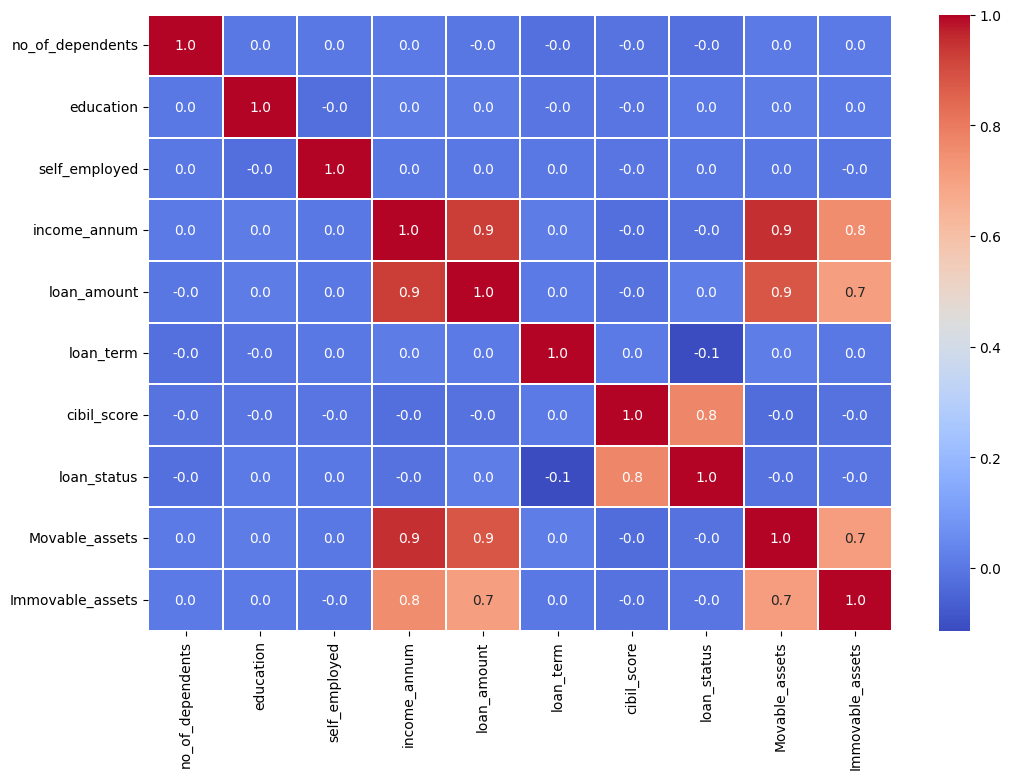

In [210]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

Movable Assets and Immovable Assets
Income and Movable Assets
Income and Immovable Assets
Movable Assets and Loan Amount
Immovable Assets and Loan Amount
Loan Status and Cibil Score
Loan Amount and Income

Positive Correlation (+1.0): As one value goes up, the other also goes up (eg: higher Income usually means higher Luxury Assets).

Negative Correlation (-1.0): As one goes up, the other goes down.

Zero Correlation (0.0): The two columns have no relationship .

In [211]:
df.corr()['loan_status']

no_of_dependents   -0.018114
education           0.004918
self_employed       0.000345
income_annum       -0.015189
loan_amount         0.016150
loan_term          -0.113036
cibil_score         0.770518
loan_status         1.000000
Movable_assets     -0.013755
Immovable_assets   -0.006200
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

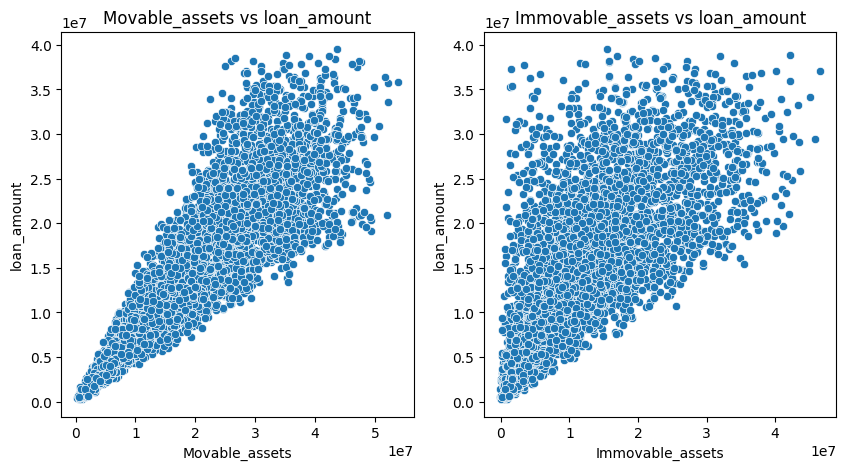

In [212]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = 'loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = 'loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

here is a positive relationship between the loan amount and both movable and immovable assets. When a person has more assets, whether movable (like money) or immovable (like property), the bank tends to offer a higher loan amount. In other words, having more assets increases the likelihood of getting a larger loan from the bank.

Loan Amount Vs Income

<Axes: xlabel='income_annum', ylabel='loan_amount'>

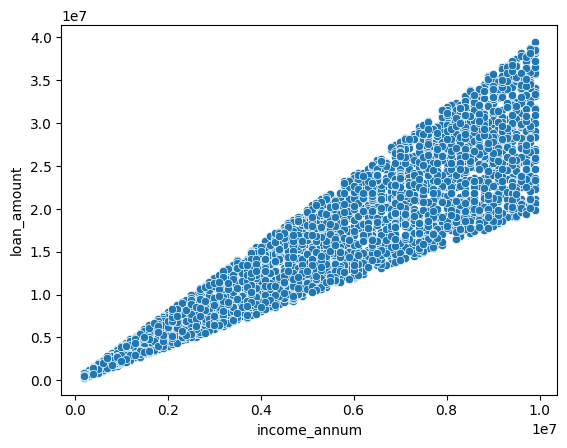

In [213]:
sns.scatterplot(x='income_annum', y = 'loan_amount', data = df)

The loan amount and the applicant's annual income share a straightforward connection. When the income is higher, the loan amount tends to be higher as well. This is because the applicant's income plays a major role in determining the appropriate loan amount they can afford to repay.

Machine Learning Model Decision.

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

In [215]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'], test_size=0.2, random_state=42)

In [216]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

lgr.fit(X_train, y_train)

predictions = lgr.predict(X_test)

In [217]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8021077283372365


In [218]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [219]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


In [220]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [221]:
dtree.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [222]:
dtree_pred = dtree.predict(X_test)


In [223]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [224]:
accuracy = accuracy_score(y_test, dtree_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9789227166276346


In [225]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [226]:
rfc.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [227]:
rfc_pred = rfc.predict(X_test)

In [228]:
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9742388758782201


Text(518.4494949494949, 0.5, 'Actual')

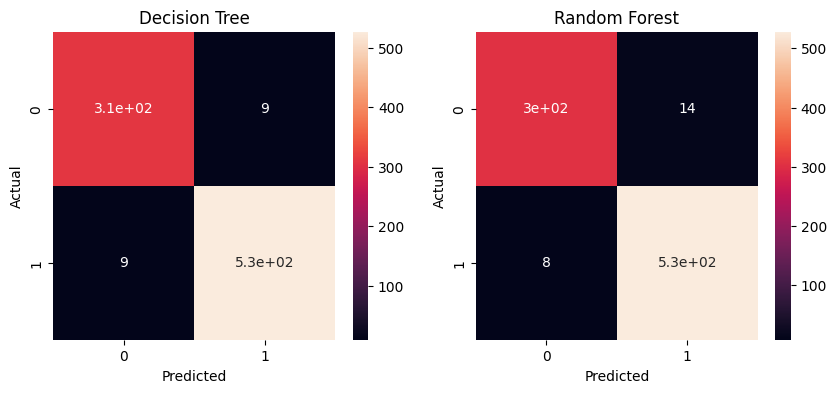

In [229]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

HYPER PARAMETER TUNING FOR RF

In [230]:
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=UserWarning, message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy")
numpy_version = np.__version__
print("NumPy Version:", numpy_version)

NumPy Version: 2.4.1


In [231]:
from sklearn.model_selection import GridSearchCV

# 1. DEFINE the settings you want the computer to test
# This is what was missing!
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 2. Setup the model
rfc = RandomForestClassifier()

# 3. Setup the Grid Search (Now 'param_grid' exists, so no more error!)
rf_Grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1, return_train_score=False)

# 4. Train it
rf_Grid.fit(X_train, y_train)

# 5. Show the winners
print("Winning Settings:", rf_Grid.best_params_)

Winning Settings: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [232]:
# 1. Create the model using the WINNING settings from your GridSearch
final_rf = RandomForestClassifier(n_estimators=50, 
                                  criterion='gini', 
                                  max_depth=None, 
                                  min_samples_split=2, 
                                  random_state=42)

# 2. Train it on your training data
final_rf.fit(X_train, y_train)

# 3. Get the final score
final_accuracy = final_rf.score(X_test, y_test)
print(f"Final Optimized Accuracy: {final_accuracy * 100:.2f}%")

Final Optimized Accuracy: 97.66%


In [233]:
rf=RandomForestClassifier(**rf_Grid.best_params_)
rf.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [234]:
rfc_pred = rf.predict(X_test)

In [235]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(X_test)
score_rf=accuracy_score(y_test,y_pred1)
score_rf


0.9800936768149883

In [236]:
f1_rf=f1_score(y_pred1,y_test)
f1_rf

0.9842154131847726

In [237]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



hyperparameter tuning for DECION TREES

In [238]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [239]:
dtree = DecisionTreeClassifier()

In [240]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [254]:
predictions = best_model.predict(X_test)

In [255]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9847775175644028


In [256]:
cm = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [257]:
f1_dtree=f1_score(predictions,y_test)
f1_dtree

0.987906976744186

 Model Evalution

Text(518.4494949494949, 0.5, 'Actual')

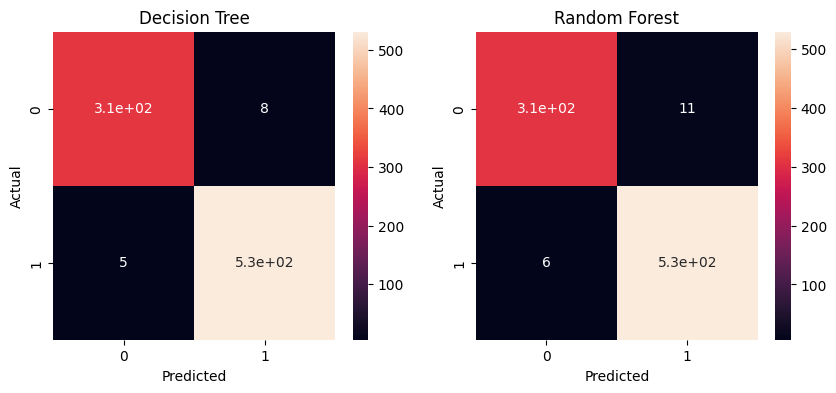

In [258]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

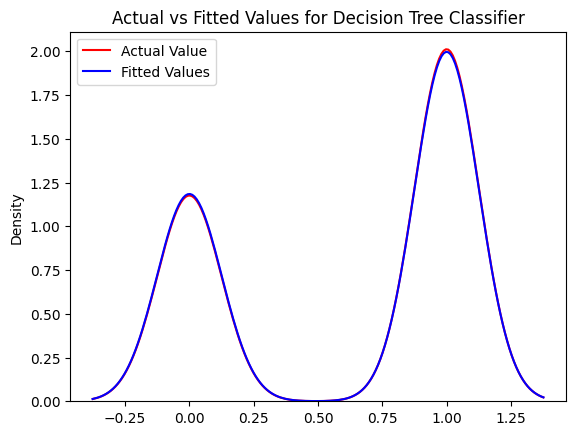

In [259]:
fig, ax = plt.subplots()
sns.kdeplot(predictions, color="r", label="Actual Value", ax=ax)
sns.kdeplot(dtree_pred, color="b", label="Fitted Values", ax=ax)
ax.set_title('Actual vs Fitted Values for Decision Tree Classifier')
ax.legend()

In [260]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [261]:
f1_dtree=f1_score(dtree_pred,y_test)
f1_dtree



0.9832089552238806

In [262]:
f1_rfc=f1_score(rfc_pred,y_test)
f1_rfc


0.9842154131847726

In [263]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('F1 SCORE of Decision Tree is',f1_dtree)
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))
print('F1 SCORE of Random Forest is',f1_rfc)

R2 score:  0.9098141368628555
Mean Squared Error:  0.02107728337236534
Mean Absolute Error:  0.02107728337236534
F1 SCORE of Decision Tree is 0.9832089552238806


R2 score:  0.9148244625926969
Mean Squared Error:  0.01990632318501171
Mean Absolute Error:  0.01990632318501171
F1 SCORE of Random Forest is 0.9842154131847726


In [264]:
import pickle

# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [265]:
# Load the model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use for predictions
predictions = loaded_model.predict(X_test)

In [266]:
loaded_model = joblib.load('random_forest_model.pkl')

# Quick sanity check
loaded_pred = loaded_model.predict(X_test)
print("Loaded model F1:", f1_score(y_test, loaded_pred))


Loaded model F1: 0.9842154131847726


In [268]:
model = joblib.load("random_forest_model.pkl")
